# **Part 1: Data Scraping**

In [1]:
import numpy as np # numpy to create matrices for data
from bs4 import BeautifulSoup as bs #beautifulsoup to scrape web
import requests # download html of site
import pandas as pd # once we finish scraping the data, we want to save it to work with later

In [2]:
page = requests.get("https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats")
soup = bs(page.content)

currRow = 0
table = None
for row in soup.findAll('table')[0].findAll('tr'): # find the data which is held in the table, and loop through the rows (which are the children)
    if(currRow == 0): #skip the first row, as it is used to label groups of columns, which would mess up our table structure.
        currRow+=1
        continue
    columns = None
    for col in row.findChildren(): ##loop through the children of the rows, which are the columns
        if(len(col.findChildren())>0): ## if there is another child to our column, dont add the text of this column or else it will double insert
            continue
        newCol = col.text
        if(newCol == 'Rk'): ## skip the entire row if we enter a row that is used to label columns
            break
        if(columns is None): # if this is our first column in the row
            columns = np.array([newCol])
        else:
            columns = np.append(columns,np.array([newCol]),axis=0)
    if(table is None): ##if this is our first row in the table
        table = columns
    elif (columns is not None):
        table = np.vstack((table,columns))
    
table = np.delete(table,[5,-1],1) ##remove emoji of league flag, and links
table

array([['1', 'Ismael Aaneba', 'fr', ..., '0.00', '0.00', '0.00'],
       ['2', 'Patrick van Aanholt', 'nl', ..., '0.11', '0.07', '0.11'],
       ['3', 'Issah Abbas', 'gh', ..., '0.00', '0.00', '0.00'],
       ...,
       ['2721', 'Martin Ødegaard', 'no', ..., '0.25', '0.12', '0.25'],
       ['2722', 'Martin Ødegaard', 'no', ..., '0.19', '0.04', '0.19'],
       ['2723', 'Filip Đuričić', 'rs', ..., '0.55', '0.23', '0.51']],
      dtype='<U28')

In [4]:
Lables = ['Name','Nation','Pos','Squad','League','Age','Born','Matches Played','Starts','Mins-Played','Full 90s', 'Goals','Assists','G-PK','PK','PK-ATT','Yellow','Red','Gls90','Ast90','G+A90','G-PK90','G+A-PK90','xG','xA','xG+xA','npxG+xA','xG90','xA90','xG+xA90','npxG90', 'npxG+xA90']
df = pd.DataFrame(table[:,1:], columns=Lables) #remove the index as pandas already does that with dataframes
df.to_excel("Big5LeaguesPlayerStats.xlsx")

# **Part 2: EDA**
Now that we have the data in a workable format, we can look at it in its raw form.

In [5]:
df

,Name,Nation,Pos,Squad,League,Age,Born,Matches Played,Starts,Mins-Played,...,G+A-PK90,xG,xA,xG+xA,npxG+xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90
0,Ismael Aaneba,fr,"FW,DF",Strasbourg,Ligue 1,21-330,1999,2,0,11,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1,Patrick van Aanholt,nl,DF,Crystal Palace,Premier League,30-238,1990,20,19,"1,684",...,0.05,1.2,1.2,0.8,2.0,0.07,0.04,0.11,0.07,0.11
2,Issah Abbas,gh,"DF,FW",Mainz 05,Bundesliga,22-210,1998,2,0,18,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Yunis Abdelhamid,ma,DF,Reims,Ligue 1,33-208,1987,30,30,"2,700",...,0.10,1.6,1.6,0.2,1.8,0.05,0.01,0.06,0.05,0.06
4,Sabit Abdulai,gh,MF,Getafe,La Liga,21-348,1999,2,0,51,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,Steven Zuber,ch,DF,Eint Frankfurt,Bundesliga,29-250,1991,16,5,489,...,0.37,0.3,0.3,1.1,1.4,0.06,0.19,0.25,0.06,0.25
2719,Martín Zubimendi,es,MF,Real Sociedad,La Liga,22-081,1999,25,13,"1,397",...,0.00,0.6,0.6,0.2,0.8,0.04,0.01,0.05,0.04,0.05
2720,Martin Ødegaard,no,MF,Arsenal,Premier League,22-128,1998,10,6,581,...,0.15,0.8,0.8,0.8,1.6,0.12,0.12,0.25,0.12,0.25
2721,Martin Ødegaard,no,"MF,FW",Real Madrid,La Liga,22-128,1998,7,3,234,...,0.00,0.1,0.1,0.4,0.5,0.04,0.15,0.19,0.04,0.19


From the website we can group the 'Pos' codes into 4 primary groups: Goalkeepers, Defenders, Midfielders, and Attackers.

In [48]:
Goalkeepers = 'GK'
Defenders = 'DF|LB|RB|CB|FB'
Midfielders = 'MF|DM|CM|LM|RM|AM|WM'
Forwards = 'FW|LW|RW'

We will want to keep players who havent played enough games out of our analysis, as small sample sizes will be more affected by outliers, so lets look at what the average amount of matches played is.

In [22]:
print("AVG matches played: {}\nMedian Matches Played: {}".format(np.asarray(df["Matches Played"], dtype=np.float).mean(),np.median(np.asarray(df["Matches Played"], dtype=np.float))))

AVG matches played: 17.030481087036357
Median Matches Played: 19.0


Lets plot the amount of matches played to get a better idea of what the distribution looks like

<AxesSubplot:xlabel='Matches Played', ylabel='Count'>

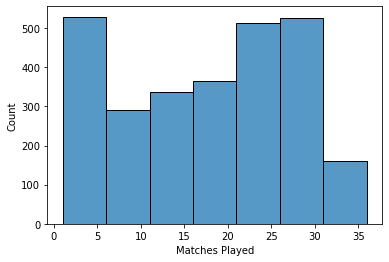

In [54]:
from matplotlib import pyplot as plt
import seaborn
seaborn.histplot(df['Matches Played'].astype('int32'),binwidth=5)

Looking at the distribution plotted by a histogram, we can see that there is a huge peak of players who only played 1-5 games throughout the season so far. These are pulling the average downwards, and we would like to look at those who are playing more often to get a true idea of the stats for players that are actively playing in Europes top 5 leagues.

<AxesSubplot:xlabel='Matches Played', ylabel='Count'>

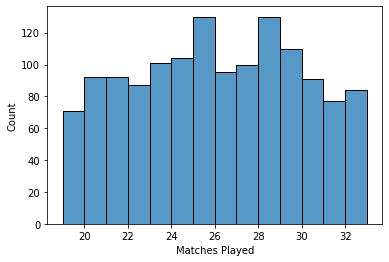

In [38]:
activedf = df.loc[df['Matches Played'].astype('int32') >= 19]
seaborn.histplot(activedf['Matches Played'].astype('int32'),binwidth=1)

By trimming the dataset to only include players that are playing over 19 (the median) games thus far in the season, our analysis will prove to be more representative of the actual play that is going on in the leauges. However, it still should be mentioned that even 19 games is not a very large sample size, and ideally we would want to be looking at players on the higher range of games but the amount of players who have played upwards of say 25 or 30 matches is relatively small compared to the amount we have over the median. 

Now that we have a somewhat representative dataset we can start exploring trends and see what we can find. For example, I would like to know what the different average ages are for different positions. Let's start by dividing the dataset into our 4 different groups of positions, because we will most likely be comparing them more in the future.

While we are at it, we can also divide the dataframes into League Specific groups much in the same way, to be used in the future as well.

In [51]:
dfGoalKeeper = activedf.loc[df['Pos'].str.contains(Goalkeepers)]
dfDefender = activedf.loc[df['Pos'].str.contains(Defenders)]
dfMidfielder = activedf.loc[df['Pos'].str.contains(Midfielders)]
dfForward = activedf.loc[df['Pos'].str.contains(Forwards)]

laLiga = activedf.loc[df['League'].str.contains('La Liga')]
ligue1 = activedf.loc[df['League'].str.contains('Ligue 1')]
bundesliga = activedf.loc[df['League'].str.contains('Bundesliga')]
premLeague = activedf.loc[df['League'].str.contains('Premier League')]
serieA = activedf.loc[df['League'].str.contains('Serie A')]

One of the things that we can look at is Age. If you are a fan of soccer, you might know that some leagues are considered slower and more playable for older players, and some positions are occupied by younger players. We can investigate these stereotypes with this data. 

Lets plot the distribution of ages for different positions, then we can do the same for the leagues. 

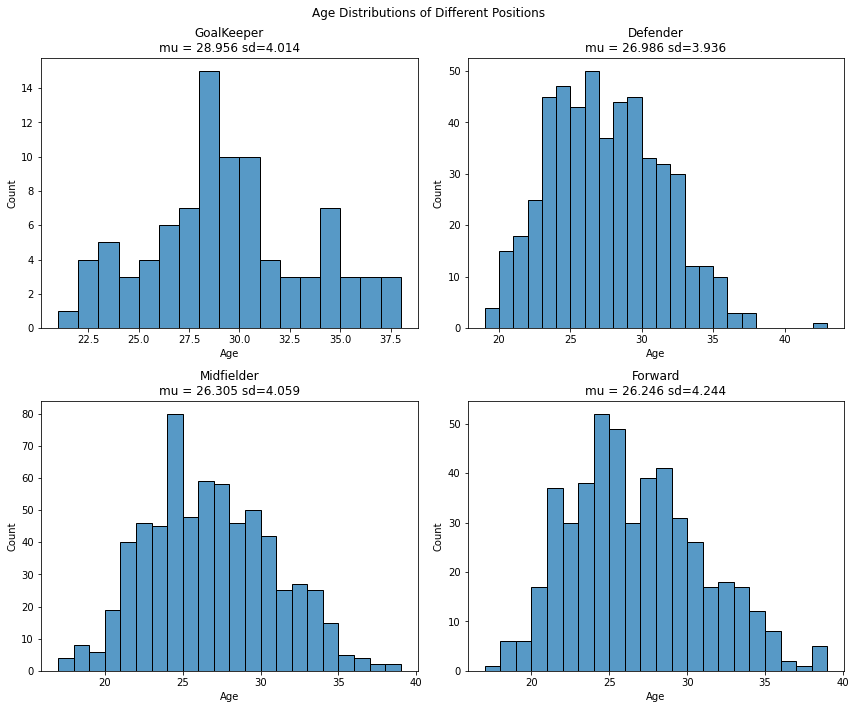

In [81]:
fig, ax = plt.subplots(2,2,figsize=(12,10))

fig.suptitle('Age Distributions of Different Positions')

ax1 = plt.subplot(2,2,1)
seaborn.histplot(dfGoalKeeper['Age'].str[0:2].astype('int32'),binwidth=1)
ax1.title.set_text('GoalKeeper\nmu = {} sd={}'.format(round(dfGoalKeeper['Age'].str[0:2].astype('int32').mean(),3), round(dfGoalKeeper['Age'].str[0:2].astype('int32').std(),3)))

ax2= plt.subplot(2,2,2)
seaborn.histplot(dfDefender['Age'].str[0:2].astype('int32'),binwidth=1)
ax2.title.set_text('Defender\nmu = {} sd={}'.format(round(dfDefender['Age'].str[0:2].astype('int32').mean(),3), round(dfDefender['Age'].str[0:2].astype('int32').std(),3)))

ax3= plt.subplot(2,2,3)
seaborn.histplot(dfMidfielder['Age'].str[0:2].astype('int32'),binwidth=1)
ax3.title.set_text('Midfielder\nmu = {} sd={}'.format(round(dfMidfielder['Age'].str[0:2].astype('int32').mean(),3), round(dfMidfielder['Age'].str[0:2].astype('int32').std(),3)))

ax4 = plt.subplot(2,2,4)
seaborn.histplot(dfForward['Age'].str[0:2].astype('int32'),binwidth=1)
ax4.title.set_text('Forward\nmu = {} sd={}'.format(round(dfForward['Age'].str[0:2].astype('int32').mean(),3), round(dfForward['Age'].str[0:2].astype('int32').std(),3)))


fig.tight_layout()

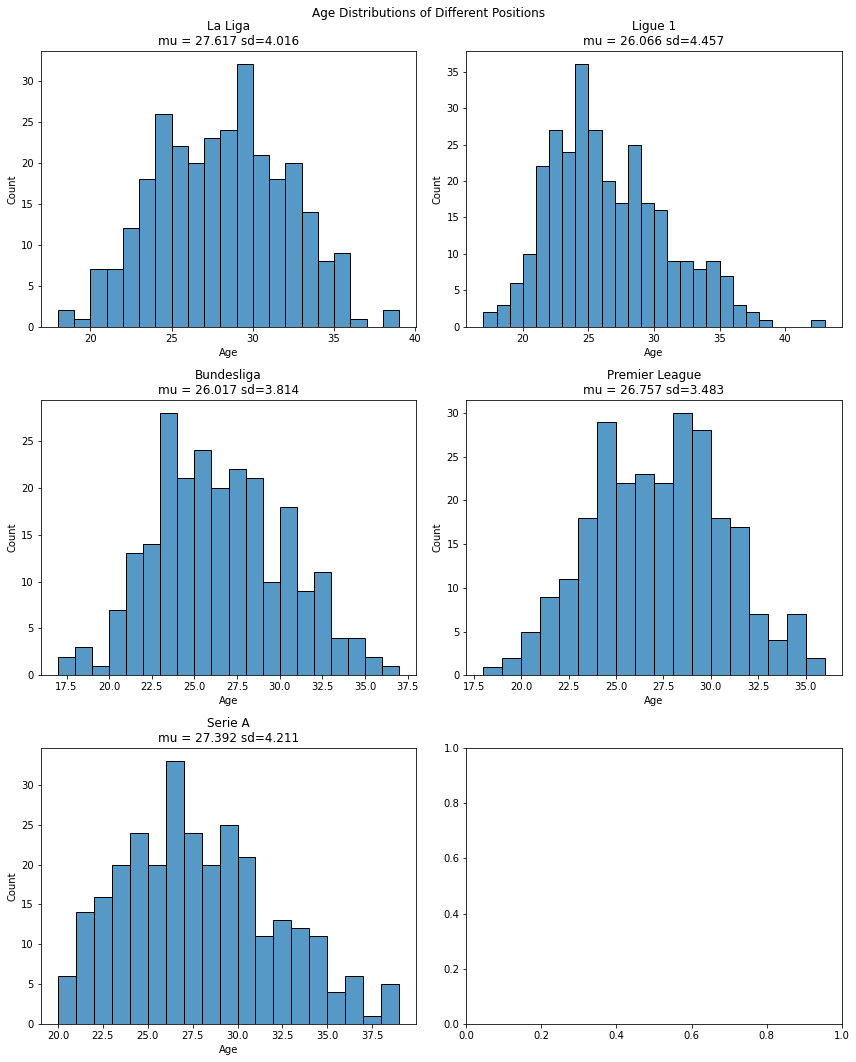

In [87]:
fig, ax = plt.subplots(3,2,figsize=(12,15))

fig.suptitle('Age Distributions of Different Positions')

ax1 = plt.subplot(3,2,1)
seaborn.histplot(laLiga['Age'].str[0:2].astype('int32'),binwidth=1)
ax1.title.set_text('La Liga\nmu = {} sd={}'.format(round(laLiga['Age'].str[0:2].astype('int32').mean(),3), round(laLiga['Age'].str[0:2].astype('int32').std(),3)))

ax2= plt.subplot(3,2,2)
seaborn.histplot(ligue1['Age'].str[0:2].astype('int32'),binwidth=1)
ax2.title.set_text('Ligue 1\nmu = {} sd={}'.format(round(ligue1['Age'].str[0:2].astype('int32').mean(),3), round(ligue1['Age'].str[0:2].astype('int32').std(),3)))

ax3= plt.subplot(3,2,3)
seaborn.histplot(bundesliga['Age'].str[0:2].astype('int32'),binwidth=1)
ax3.title.set_text('Bundesliga\nmu = {} sd={}'.format(round(bundesliga['Age'].str[0:2].astype('int32').mean(),3), round(bundesliga['Age'].str[0:2].astype('int32').std(),3)))

ax4 = plt.subplot(3,2,4)
seaborn.histplot(premLeague['Age'].str[0:2].astype('int32'),binwidth=1)
ax4.title.set_text('Premier League\nmu = {} sd={}'.format(round(premLeague['Age'].str[0:2].astype('int32').mean(),3), round(premLeague['Age'].str[0:2].astype('int32').std(),3)))

ax5 = plt.subplot(3,2,5)
seaborn.histplot(serieA['Age'].str[0:2].astype('int32'),binwidth=1)
ax5.title.set_text('Serie A\nmu = {} sd={}'.format(round(serieA['Age'].str[0:2].astype('int32').mean(),3), round(serieA['Age'].str[0:2].astype('int32').std(),3)))


fig.tight_layout()

Looking at these graphs we can begin to investigate some of the common Age-related stereotypes.
1. SerieA is for old players
2. Forwards are more often younger players/ Goalkeepers are older.


### Serie A is Older
1. We can see that Serie A has the second highest average age out of the top 5 leagues, although it is beaten out by La Liga for the highest average age. So we can see that the idea that Serie A is the oldest league is incorrect, but we can go further than that, and see if age difference between the Serie A and Bundesliga (the youngest league) is statistically significant. 

In [102]:
from scipy import stats
bundesT = stats.ttest_ind(serieA['Age'].str[0:2].astype('int32'),bundesliga['Age'].str[0:2].astype('int32'))[1]
laLigaT = stats.ttest_ind(serieA['Age'].str[0:2].astype('int32'),laLiga['Age'].str[0:2].astype('int32'))[1]
LigueT = stats.ttest_ind(serieA['Age'].str[0:2].astype('int32'),ligue1['Age'].str[0:2].astype('int32'))[1]
premT = stats.ttest_ind(serieA['Age'].str[0:2].astype('int32'),premLeague['Age'].str[0:2].astype('int32'))[1]
print("Bundesliga: {}\nLa Liga: {}\nLigue 1: {}\nPremier League: {}\n".format(bundesT,laLigaT,LigueT,premT))

Bundesliga: 0.0001239838219698646
La Liga: 0.512821269807462
Ligue 1: 0.00023746119891128293
Premier League: 0.05836178421368518



Using an alpha of .05, we can compare our p-values listed above to see where the age in the Serie A is statistically significantly different. From doing this we can see that the age is Serie A is statistically significantly different from the ages in the Bundesliga and Ligue 1, our two youngest leagues. 

These findings do suggest that Serie A is inhabited more so by older players than the other leagues mentioned above, and gives some credability to stereotype #1. 

### Forwards are Younger
2. Looking at the age distributions of the different positions, it is quite clear to see that outfield positions further up the field tend to be younger, while Goalkeepers and defenders tend to be older. Just to be sure though we will once more use Student's T-Test with an alpha of .05 to compare Forwards Ages to the other positions.

In [107]:
midT = stats.ttest_ind(dfForward['Age'].str[0:2].astype('int32'),dfMidfielder['Age'].str[0:2].astype('int32'))[1]
defT = stats.ttest_ind(dfForward['Age'].str[0:2].astype('int32'),dfDefender['Age'].str[0:2].astype('int32'))[1]
gkT = stats.ttest_ind(dfForward['Age'].str[0:2].astype('int32'),dfGoalKeeper['Age'].str[0:2].astype('int32'))[1]
print("Midfielders: {}\nDefenders: {}\nGoalKeepers: {}\n".format(midT,defT,gkT))

Midfielders: 0.8136599631167705
Defenders: 0.004483457892797526
GoalKeepers: 2.765548890289379e-08



Looking at the p-values generated from the t-test, we can see that the distribution of forward ages is statistically significantly different from both defenders and goalkeepers, with goalkeepers being very significantly different. 

## Investigating Goals Scored
You could continue looking into the dataset as much as you would like and find a number of things, but with nothing specific to look for you will have trouble finding interesting data. As much as a lot of people enjoy watching soccer, the main thing that drives people to the sport is the goals, so lets see who the most consistent scorers are in Europe. 

xG is the expected Goals of a player, or the number of goals on average a person would score being in the position that the player had a shooting chance in. This is a measure of a players ability to get into good positions and create chances. While the Goals column simply represents the number of goals scored.

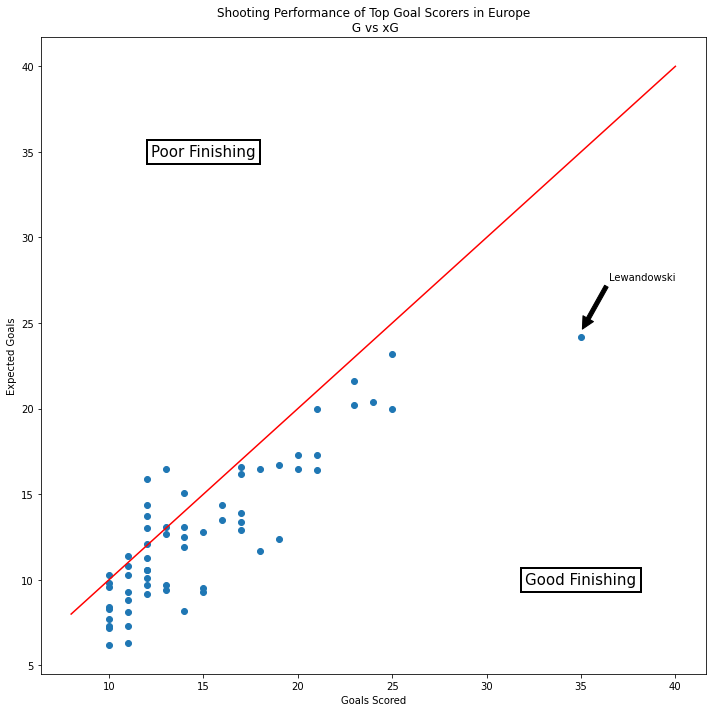

In [179]:
topScorers = dfForward.loc[dfForward['Goals'].astype('int32') >= 10] # get players with 10 or more goals (top scorers)
plt.scatter(topScorers['Goals'].astype('int32'),topScorers['xG'].astype('float'))
plt.rcParams["figure.figsize"] = (10,10)

plt.plot([8,40],[8,40], 'r')
plt.title("Shooting Performance of Top Goal Scorers in Europe\n G vs xG")
plt.xlabel("Goals Scored")
plt.ylabel("Expected Goals")

plt.text( 35, 10, "Good Finishing", ha="center", va="center", rotation=0, size=15,bbox=dict(boxstyle="Square,pad=0.3", fc="white", ec="black", lw=2))
plt.text( 15, 35, "Poor Finishing", ha="center", va="center", rotation=0, size=15,bbox=dict(boxstyle="Square,pad=0.3", fc="white", ec="black", lw=2))

plt.annotate('Lewandowski', xy=(35, 24.5),  xycoords='data',
            xytext=(40, 28), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.tight_layout()

In [147]:
topScorers[['Name','Goals','xG']].sort_values(by=['Goals'])

,Name,Goals,xG
52,Lucas Alario,10,6.2
2659,Callum Wilson,10,9.6
2678,Burak Yılmaz,10,7.7
1465,José Luis Morales,10,7.2
1147,Danny Ings,10,7.3
...,...,...,...
1614,Kylian Mbappé,23,20.2
2331,André Silva,24,20.4
2181,Cristiano Ronaldo,25,23.2
1661,Lionel Messi,25,20.0


By looking at the data above and connecting it to the plot, we get a general idea of who some of the big names in football are. Chances are you'll have heard of most of the players with the most goals. From our graph it is apparent that the more shots a person is taking, for the most part, the more goals they will be scoring, and most of the top scorers of Europe are consistently outperforming their xG, which makes sense considering they are the best players so we might expect them to outperform the expectations of an average player in those shooting positions.

# Conclusion
In this project we started by scraping data off the web and cleaned it to perform some analysis. We walked through various paths one could take with the data, and used a combination of visualizations and statistical tests to make some base level conclusions. From here we could continue with this data and look more in depth at the most promising young players, the best players in terms of both scoring goals and assisting, or differences between playstyles in leagues. All of these tasks would be easy to due with the ground work laid out above, and could prove to be interesting. 

Potential confounds could be found in comparing against leagues, so another interesting avenue would be to compare the average xG of one league versus another, and introduce a weighted xG and Goals scored to more adequetly compare the scoring numbers of players across leagues. 

Disclaimer: This data was collected on 4/24/21, so results will change throughout the season which could effect the analysis.